In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [4]:
VERBOSE = True

cleaned_data_location = '../data/gapminder_cleaned.csv'

try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
    
except FileNotFoundError:
    print("Could not find data file, check path? You tried", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [5]:
years = df['year'].unique()
years.sort()
assert years[-1] == 2007

# The assert function would let me know if that statement is not true

In [14]:
#Calculate mean life expectancy for any given continent by all years
category = 'lifeexp'
continent = 'americas'

mask_continent = df['continent'] == continent
df_continent = df[mask_continent]
# Pulls out all rows with asia as the continent

years = df_continent['year'].unique()
summary = []
#groups all countries in asia by year and creates an empty list to fill with the average life expectancy
#that we are going to code for next

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))
    
assert len(summary) == 12
#we know there are only 12 years, so this is a way to check to make sure nothing is going wrong

#Turn the summary into a data frame so we can easily visualize it
result_df = pd.DataFrame(summary, columns = ['continent', 'year', category])
result_df

,continent,year,lifeexp
0,americas,1952,53.27984
1,americas,1957,55.96028
2,americas,1962,58.39876
3,americas,1967,60.41092
4,americas,1972,62.39492
5,americas,1977,64.39156
6,americas,1982,66.22884
7,americas,1987,68.09072
8,americas,1992,69.56836
9,americas,1997,71.15048


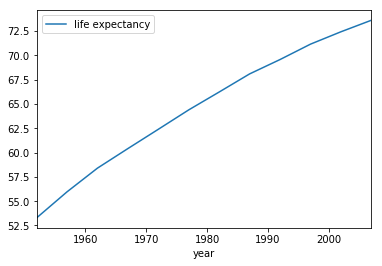

In [15]:
result_df.plot.line('year', category, label = 'life expectancy')

In [16]:
def calculate_mean_over_time(data, category, continent, verbose=False):
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    #Loop over the years and calculate the statistic of interest
    years = df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append((continent, year, value))
    
    # There should be 12 records for each continent
    assert len(summary) == 12

    # Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return result_df

In [17]:
calculate_mean_over_time(df, 'lifeexp', 'asia', True)

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [31]:
#What if you wanted to find out about different statistics? Not just mean. And you don't want to go back and 
#replace the command everytime.

def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic through time
        
        Args:
            data: a data frame
            category: one of the column headers of the data frame (ex. 'lifeexp')
            continent: possible value of continent column in that data frame (ex. 'asia')
            func: the function to apply to data values (ex. np.mean)
                
        Return:
            a summary table of value per year.
    """
    
    #check the values
    assert category in data.columns.values, 'Category must be one of the data frame columns.'
    assert 'continent' in data.columns.values, 'Continent column not found in data frame.'
    assert continent in data['continent'].unique(), 'Continent value not found in data frame.'
    
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    years = df_continent['year'].unique()
    summary = []

    for year in years:
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append((continent, year, value))
    
    # There should be 12 records for each continent
    assert len(summary) == 12

    # Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return result_df

In [24]:
calculate_statistic_over_time(df, 'lifeexp', 'asia', np.std)

,continent,year,lifeexp
0,asia,1952,9.149884
1,asia,1957,9.488314
2,asia,1962,9.670690
3,asia,1967,9.503613
4,asia,1972,9.574253
5,asia,1977,9.869177
6,asia,1982,8.404905
7,asia,1987,8.078536
8,asia,1992,7.952251
9,asia,1997,7.967634


In [25]:
calculate_statistic_over_time(df, 'lifeexp', 'asia', np.median)

,continent,year,lifeexp
0,asia,1952,44.869
1,asia,1957,48.284
2,asia,1962,49.325
3,asia,1967,53.655
4,asia,1972,56.950
5,asia,1977,60.765
6,asia,1982,63.739
7,asia,1987,66.295
8,asia,1992,68.690
9,asia,1997,70.265


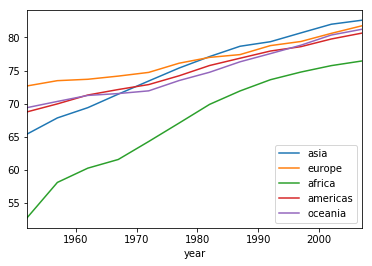

In [35]:
continents = df['continent'].unique()
fig, ax = plt.subplots()

for continent in continents:
    func = np.max
    output = calculate_statistic_over_time(df, category, continent, func)
    output.plot.line('year', category, ax=ax, label=continent)